In [55]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [56]:
dataset = pd.read_csv('USArrests.csv')
dataset.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [57]:
X = dataset.iloc[:, 1:3].values # take murder and assault

In [58]:
X[:5, :]

array([[ 13.2, 236. ],
       [ 10. , 263. ],
       [  8.1, 294. ],
       [  8.8, 190. ],
       [  9. , 276. ]])

In [59]:
m = X.shape[0]
n = X.shape[1]
n_iter = 1000

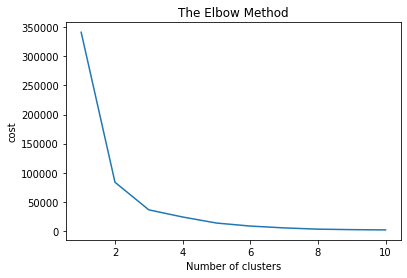

In [60]:
# implementing the same algorithm using the sklearn library
# with the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

cost = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    cost.append(kmeans.inertia_)
    
plt.plot(range(1, 11), cost)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('cost')
plt.show()

In [110]:
K = 2

In [111]:
centroids = np.zeros([n * K])
centroids = centroids.reshape(n, K)
# each column of this n x K matrix 
# is a centroid of one cluster

In [112]:
centroids

array([[0., 0.],
       [0., 0.]])

In [113]:
# pick random centroids
for k in range(K):
    rand = random.randint(0, m-1)
    centroids[:, k] = X[rand]

In [114]:
centroids

array([[  9. ,  11.1],
       [276. , 254. ]])

In [115]:
output = {}

In [116]:
distance = np.zeros([m * K])
distance = distance.reshape(m, K)

In [117]:
for k in range(K):
    temp_distance = np.sum((X - centroids[:, k]) ** 2, axis = 1)
    distance[:, k] = temp_distance
    
# assign each sample to closest centroid
clusters = np.argmin(distance, axis = 1) + 1

In [118]:
clusters

array([2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [119]:
C1 = np.where(clusters == 1) # indexes of the samples in cluster 1
C2 = np.where(clusters == 2) # indexes of the samples in cluster 2
# C3 = np.where(clusters == 3) # indexes of the samples in cluster 3

In [120]:
Y1 = X[C1] # Group of samples in cluster1
Y2 = X[C2] # Group of samples in cluster2
# Y3 = X[C3] # Group of samples in cluster3
C1 = Y1.mean(axis = 0) #mean value of cluster1
C2 = Y2.mean(axis = 0) #mean value of cluster2
# C3 = Y3.mean(axis = 0) #mean value of cluster3

In [82]:
plots = []

In [121]:
for i in range(n_iter):
    for k in range(K):
        temp_distance = np.sum((X - centroids[:, k]) ** 2, axis = 1)
        distance[:, k] = temp_distance

    clusters = np.argmin(distance, axis = 1) + 1
    C1 = np.where(clusters == 1)
    C2 = np.where(clusters == 2)
#     C3 = np.where(clusters == 3)
    Y1 = X[C1]
    Y2 = X[C2]
#     Y3 = X[C3]
    C1 = Y1.mean(axis = 0)
    C2 = Y2.mean(axis = 0)
#     C3 = Y3.mean(axis = 0)
    
    centroids[:, 0] = C1
    centroids[:, 1] = C2
#     centroids[:, 2] = C3
    
#     plot_kmeans(Y1, Y2, Y3, C1, C2, C3)
#     values = [Y1, Y2, Y3, C1, C2, C3]
#     plots.append(values)

In [122]:
def plot_kmeans(Y1, Y2, C1, C2):
    plt.figure()
    color = ['red', 'blue', 'green']
    plt.scatter(Y1[:, 0], Y1[:, 1], c = color[0])
    plt.scatter(Y2[:, 0], Y2[:, 1], c = color[1])
#     plt.scatter(Y3[:, 0], Y3[:, 1], c = color[2])
    plt.scatter(C1[0], C1[1], s = 100, c = 'yellow')
    plt.scatter(C2[0], C2[1], s = 100, c = 'yellow')
#     plt.scatter(C3[0], C3[1], s = 100, c = 'yellow')
    plt.xlabel('Murder')
    plt.ylabel('Assault')
    plt.show()

In [108]:
# for i in range(len(plots)):
#     plot_kmeans(plots[i][0], plots[i][1], plots[i][2], plots[i][3], plots[i][4], plots[i][5])

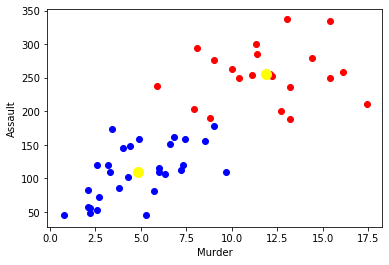

In [123]:
plot_kmeans(Y1, Y2, C1, C2)